# I. Algorithm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.optimize import linprog, milp, Bounds, LinearConstraint

In [16]:
def build_adj(data):
    '''
    Given a data matrix that contains the edges that connect vertices, this function builds the adjacency matrix that connects edges
    '''
    # Find the number of vertices
    vertices = np.max(data)
    adj = np.zeros((vertices+1, vertices+1))
    for i in range(0,len(data)):
        adj[int(data[i,0]),int(data[i,1])] = 1
        adj[int(data[i,1]),int(data[i,0])] = 1
    return adj  


def maxclique(adj):
    '''
    Given adjacency matrix, returns the vertices of maximum clique
    '''
    l = len(adj)
    # Creating complementary adjacent matrix
    adjcomp = 1 - adj - np.eye(l)

    # Finding vertices that are not adjacent
    [v1,v2] = np.where(adjcomp==1)

    # Creating constraint matrix
    A = np.zeros((len(v1),l))
    b = np.ones(len(v1))
    for i in range(0,len(v1)):
        A[i,v1[i]] = 1
        A[i,v2[i]] = 1
    
    f = -np.ones(l)
    integrality = np.ones(l)
    lb = np.zeros(l)
    ub = np.ones(l)
    variable_bounds = Bounds(lb, ub)
    constraints = LinearConstraint(A,-np.inf,b)

    # Using MILP linear program solver
    res_milp = milp(f, integrality = integrality, bounds=variable_bounds,constraints = constraints) 
    res_milp.x = [int(x_i) for x_i in res_milp.x]

    # Choose all vertices for maximum clique
    new_vertices = np.where(abs(res_milp.x+f)<0.001) 
    new_vertices=new_vertices[0].tolist()   
    return new_vertices

# II. Application to Graph

Now I will apply this to the Peterson Graph. It's pretty obvious that the maximum clique is 5 here.

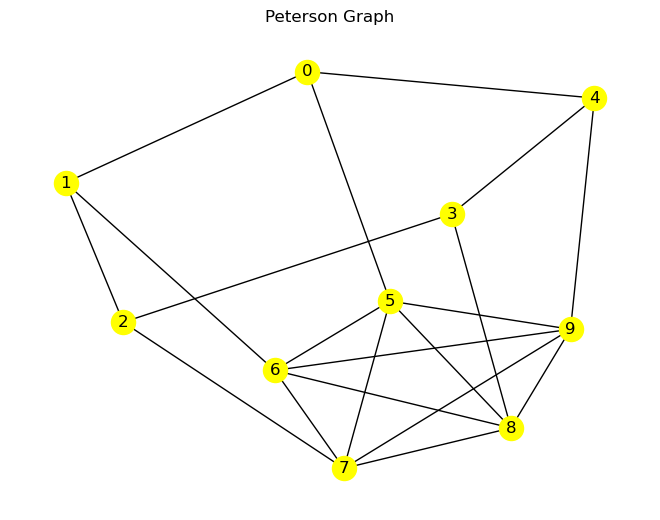

In [21]:
peterson_edges = np.array([[0, 1],
 [0, 5],
 [0, 4],
 [1, 6],
 [1, 2],
 [2, 3],
 [2, 7],
 [3, 4],
 [3, 8],
 [4, 9],
 [5, 9],
 [5, 6],
 [5, 8],
 [5, 7],
 [6, 7],
 [6, 8],
 [6, 9],
 [7, 8],
 [7, 9],
 [8, 9]])

peterson_adj = build_adj(peterson_edges)

peterson = nx.Graph(peterson_adj)
nx.draw(peterson, with_labels = True, node_color= 'yellow')
plt.title('Peterson Graph')
plt.show()

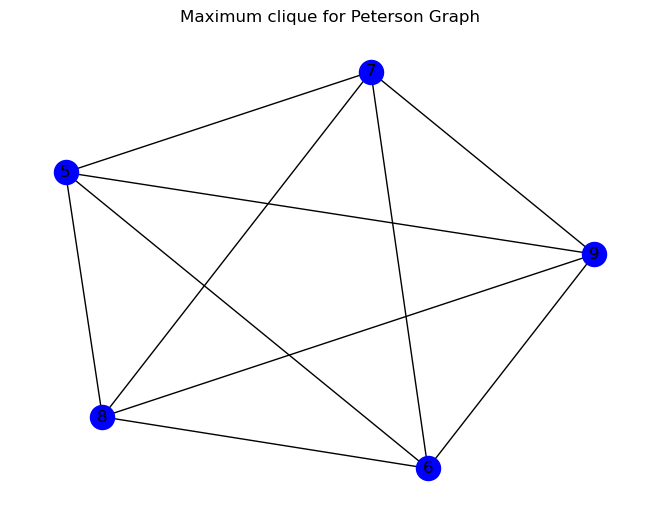

In [22]:
# plotting the maximum clique
new_vertices = maxclique(peterson_adj)
subgraph = peterson.subgraph(new_vertices)
nx.draw(subgraph, with_labels = True, node_color= 'blue')
plt.title('Maximum clique for Peterson Graph')
plt.show()